In [117]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

Your Name and PRN:
- Name : ______________________
- PRN  : ______________________
- Date : ______________________

# Deep Neural Networks

## Assignment: A03
### Take Neural Network implementation with:
- One hidden layer 
- ${Tanh}$ activation function


### Assignment - Answer all Questions
- **Q1**: Is this model more accurate compared to previous model?
- **Q2**: Prepare table by changing number of neurons in hidden layer, learning rate and observe change in results. Also comment on your results.

|#|Dimension of hidden layer|Learning rate|Training Accuracy|Test Accuracy|Comment|
|:-:|:-:|:-:|:-:|:-:|:--|
|1|4|0.1|0.97|0.96|Base case||1|4|0.1|0.97|0.96|Base case|
|2|1|1|???|???|???|
|3|2|0.01|...|...|...|
|4|3|...|...|...|...|
|5|...|...|...|...|...|
|6|...|...|...|...|...|

- **Q3**: What lines will you change to convert it into multi-class prediction model?
- **Q4**: How many epochs are sufficient?

In [118]:
###-----------------
### Import Libraries
###-----------------

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections.abc import Callable
from typing import Literal

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

%matplotlib inline

In [119]:
###------------------
### Global Parameters
###------------------

# Directories
#inpDir = '../../input' 
# inpDir = Path('..') / '..' / 'input'
# # outDir = '../output'
# outDir = Path('..') / 'output'


RANDOM_STATE = 42
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

TEST_SIZE  = 0.2 # Size of test data

NOISE = 0.2
N_SAMPLE = 1000
EPOCHS = 20001
ALPHA = 0.1


# Parameters for plotting
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params)

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')


# numpy random set
rng = np.random.default_rng(seed=RANDOM_STATE)

In [120]:
X, y = make_moons(n_samples=N_SAMPLE, noise=NOISE, shuffle=True, random_state=RANDOM_STATE)

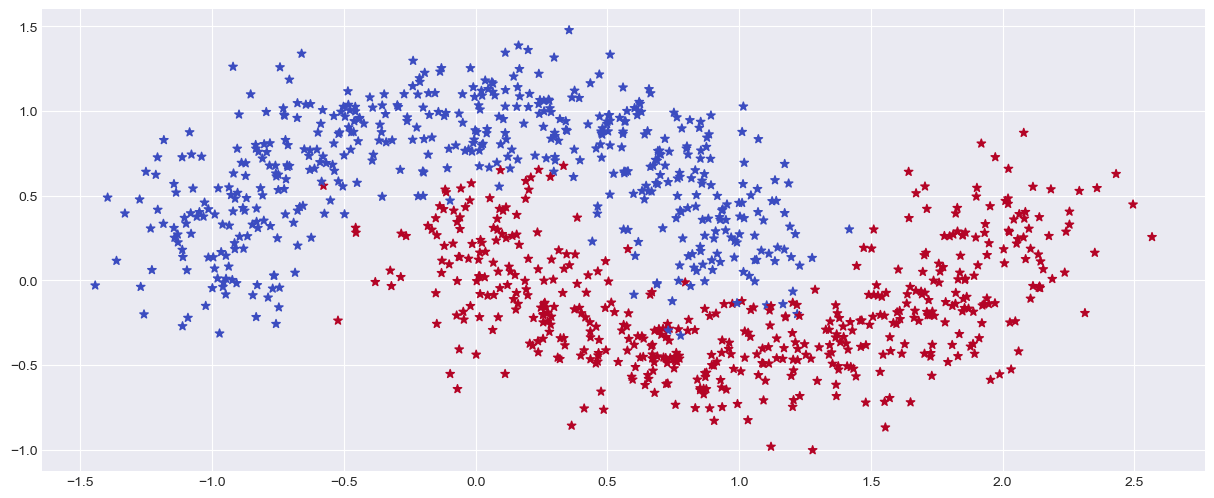

In [121]:
plt.scatter(X[:, 0], X[:, 1], s=40, c=y, marker='*', cmap=CMAP)

In [122]:
data_df = pd.DataFrame(X, columns=['A','B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,-0.111667,0.520224,1
1,1.142650,-0.342577,1
2,0.795558,-0.011442,1
3,0.111827,-0.551932,1
4,-0.816466,0.543996,0


In [123]:
y = pd.get_dummies(y).to_numpy()

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800, 2), (200, 2))

In [125]:
def fn_softmax(z: np.ndarray) -> float:
    exp_score = np.exp(z - np.max(z))
    return exp_score/np.sum(exp_score, axis=1, keepdims=True)

In [126]:
def fn_activ(z):
    return np.tanh(z)

def fn_activ_prime(z):
    return 1.0 - np.tanh(z)**2

In [127]:
y_train.shape, X.shape, y.shape

((800, 2), (1000, 2), (1000, 2))

 __ IP __  (tanh)->  ____ (softmax) -> output

In [128]:
def calculate_loss(model, X_l, y_l):
    W1 = model['W1']
    W2 = model['W2']
    b1 = model['b1']
    b2 = model['b2']

    m = X_l.shape[0]

    # First Layer
    z1 = X_l.dot(W1) + b1
    a1 = fn_activ(z1)

    # Last Layer
    z2 = a1.dot(W2) + b2
    a2 = fn_softmax(z2)

    data_loss = -(y_l * np.log(a2) + (1-y_l) * np.log(1-a2)).sum()
    return data_loss/m

In [129]:
def predict(model, X_p):
    W1 = model['W1']
    W2 = model['W2']
    b1 = model['b1']
    b2 = model['b2']

    # First Layer
    z1 = X_p.dot(W1) + b1
    a1 = fn_activ(z1)

    # Last Layer
    z2 = a1.dot(W2) + b2
    a2 = fn_softmax(z2)

    return a2.argmax(axis=1)

In [130]:
loss_hist = {}

param = {}
param['h_dim'] = [X_train.shape[1], 5, y_train.shape[1]]
param


{'h_dim': [2, 5, 2]}

In [131]:
def build_model(param, train_x, train_y, test_x, test_y, alpha, n_epoch):
    m = train_x.shape[0]
    nn_output_dim =  y.shape[1]

    W1 = rng.random((param['h_dim'][0], param['h_dim'][1])) / np.sqrt(param['h_dim'][0])
    W2 = rng.random((param['h_dim'][1], param['h_dim'][2])) / np.sqrt(param['h_dim'][1])

    b1 = np.zeros((1,param['h_dim'][1]))
    b2 = np.zeros((1,param['h_dim'][2]))

    loss, epoch, test_loss = [], [], []

    for i in range(n_epoch):
        # first layer
        z1 = train_x.dot(W1) + b1
        a1 = fn_activ(z1)

        # last layer
        z2 = a1.dot(W2) + b2
        a2 = fn_softmax(z2)

        # --------------------
        # BACKWARD
    # LAST LAYER
        dz2 = a2 - train_y
        assert(z2.shape == dz2.shape), f'Shape z2: {z2.shape}, {dz2.shape}'

        dW2 = a1.T.dot(dz2)
        assert(W2.shape == dW2.shape), f'Shape W5: {W2.shape},{dW2.shape}'

        db2 = np.sum(dz2, axis=0, keepdims=True)
        assert(db2.shape == db2.shape), f'Shape b5: {b2.shape},{db2.shape}'

        da1 = dz2.dot(W2.T)
        assert(a1.shape == da1.shape),  f'Shape a4: {a1.shape},{da1.shape}'

        # FIRST LAYER
        dz1 = da1 * fn_activ_prime(z1)
        assert(z1.shape == dz1.shape),  f'Shape b2: {z1.shape},{dz1.shape}'

        dW1 = (train_x.T).dot(dz1)
        assert(W1.shape == dW1.shape), f'Shape b2: {W1.shape},{dW1.shape}'

        db1 = np.sum(dz1, axis=0, keepdims=True)
        assert(b1.shape == db1.shape), f'Shape b2: {b1.shape},{db1.shape}'

        W1 = W1 - alpha * dW1 / m
        b1 = b1 - alpha * db1 / m
        W2 = W2 - alpha * dW2 / m
        b2 = b2 - alpha * db2 / m

        model = {'W1':W1, 'W2':W2,
                'b1':b1,  'b2':b2, }


        current_loss = calculate_loss(model, train_x, train_y)
        current_test_loss = calculate_loss(model, test_x, test_y)

        epoch.append(i)
        loss.append(current_loss)
        test_loss.append(current_test_loss)
        if i%5000 == 0:
            print(f'epoch - {i}: Loss - {current_loss:.5f}, Test Loss - {current_test_loss:.5f}')

    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss
    loss_hist['test_loss'] = test_loss

    return model





SCALING

In [132]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

1. 4 Neurons in hidden layer

In [133]:
loss_hist = {}

param = {}
param['h_dim'] = [X_train.shape[1], 5, y_train.shape[1]]
param


{'h_dim': [2, 5, 2]}

In [134]:
model = build_model(param, X_train_scl, y_train, X_test_scl,
                    y_test, alpha=ALPHA, n_epoch=EPOCHS)
# model

epoch - 0: Loss - 1.44317, Test Loss - 1.44190
epoch - 5000: Loss - 0.15297, Test Loss - 0.10267
epoch - 10000: Loss - 0.13079, Test Loss - 0.09198
epoch - 15000: Loss - 0.12417, Test Loss - 0.09312
epoch - 20000: Loss - 0.12061, Test Loss - 0.09373


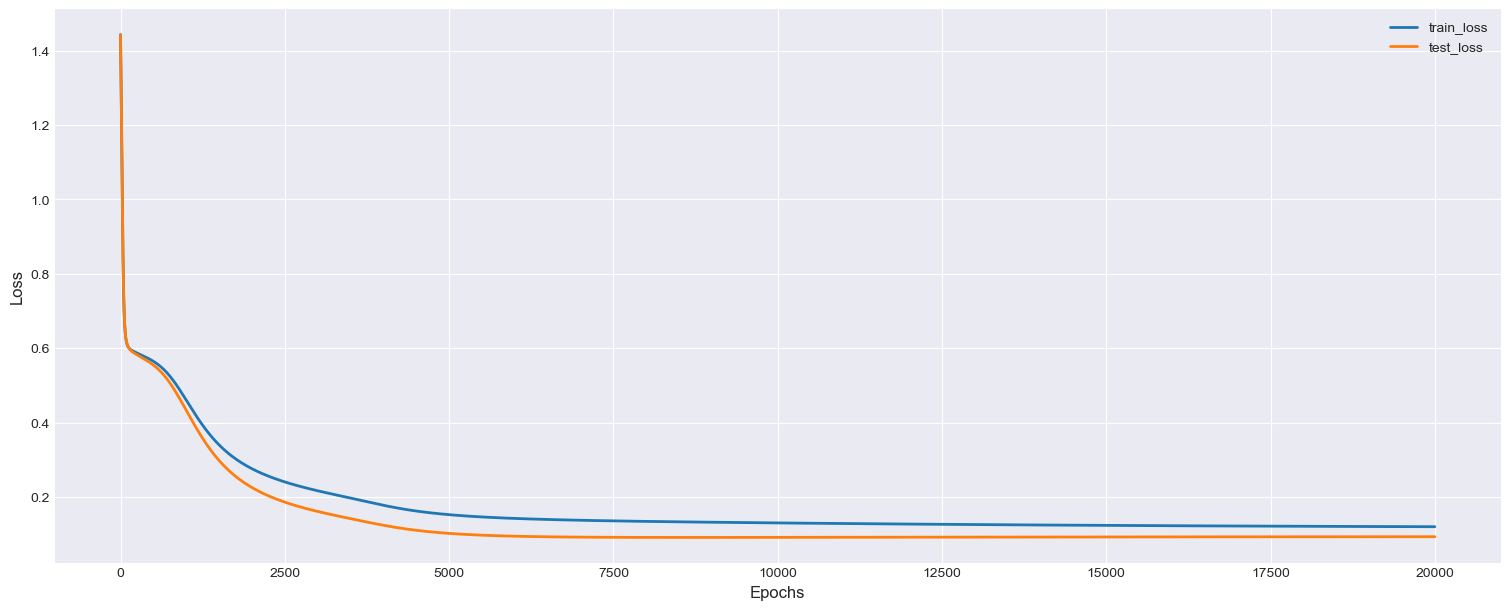

In [135]:
loss_df = pd.DataFrame(loss_hist)
fig, ax = plt.subplots()

ax.plot(loss_df['loss'], label='train_loss', lw=2)
ax.plot(loss_df['test_loss'], label='test_loss', lw=2)
ax.legend()
plt.tight_layout()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [136]:
def fn_plot_decision_boundary(X: np.ndarray, y: np.ndarray, model:dict, predict):
    
    # Initialize the figure with specified dimensions
    fig, ax = plt.subplots( figsize=(8, 5) )
    
    # Small increment value to create a fine grid for smooth decision boundary
    dm = 0.01
    padding = 2 * dm
    
    # Calculate the range for x-axis (first feature) with padding
    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    
    # Calculate the range for y-axis (second feature) with padding  
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding
    
    # Create a mesh grid covering the entire feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    # Flatten the mesh grid arrays and stack them column-wise to create coordinate pairs
    XX = np.c_[xx.ravel(), yy.ravel()] # Resulting shape: (n_points, 2)

    # List to collect predictions for each point in the mesh grid
    y_pred = predict(model,XX)
        
    # Reshape predictions to match the original mesh grid dimensions
    Z = np.array(y_pred).reshape(xx.shape)

    # Create filled contour plot showing the decision regions
    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    
    # Scatter plot of the actual data points, colored by their true class labels
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.bwr)
    
    # Set plot title and axis labels
    ax.set_title('Decision Boundary')
    ax.set_xlabel('A')  
    ax.set_ylabel('B') 
    
    # Display the final plot
    plt.show()

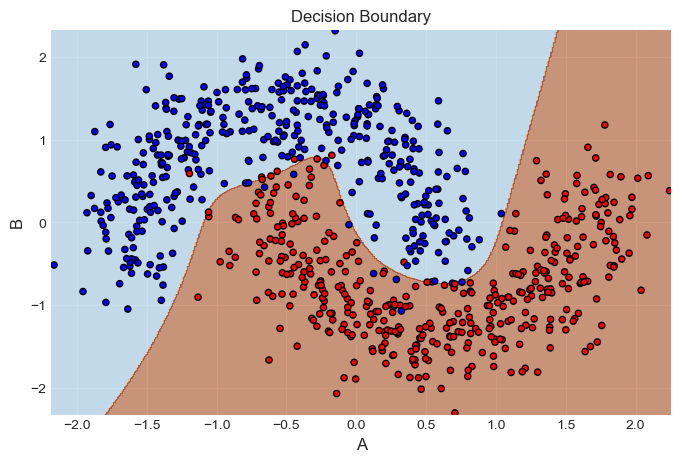

In [137]:
fn_plot_decision_boundary(X_train_scl, y_train.argmax(axis=1), model, predict)

In [138]:
y_pred = predict(model, X_train_scl)
from sklearn.metrics import accuracy_score, classification_report,\
                            confusion_matrix, ConfusionMatrixDisplay, f1_score

print(classification_report(y_train.argmax(axis=1), y_pred))
f1 = f1_score(y_train.argmax(axis=1), y_pred, average='weighted')


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       400
           1       0.98      0.98      0.98       400

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



on test set

In [139]:
y_pred = predict(model, X_test_scl)
from sklearn.metrics import accuracy_score, classification_report,\
                            confusion_matrix, ConfusionMatrixDisplay, f1_score

print(classification_report(y_test.argmax(axis=1), y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       1.00      0.98      0.99       100

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



2. For 1 neuron in hidden layer

In [140]:
loss_hist = {}

param = {}
param['h_dim'] = [X_train.shape[1], 1, y_train.shape[1]]
param


{'h_dim': [2, 1, 2]}

In [141]:
model = build_model(param, X_train_scl, y_train, X_test_scl,
                    y_test, alpha=1, n_epoch=EPOCHS)
# model

epoch - 0: Loss - 1.38501, Test Loss - 1.38575
epoch - 5000: Loss - 0.59601, Test Loss - 0.59869
epoch - 10000: Loss - 0.59601, Test Loss - 0.59869
epoch - 15000: Loss - 0.59601, Test Loss - 0.59869
epoch - 20000: Loss - 0.59601, Test Loss - 0.59869


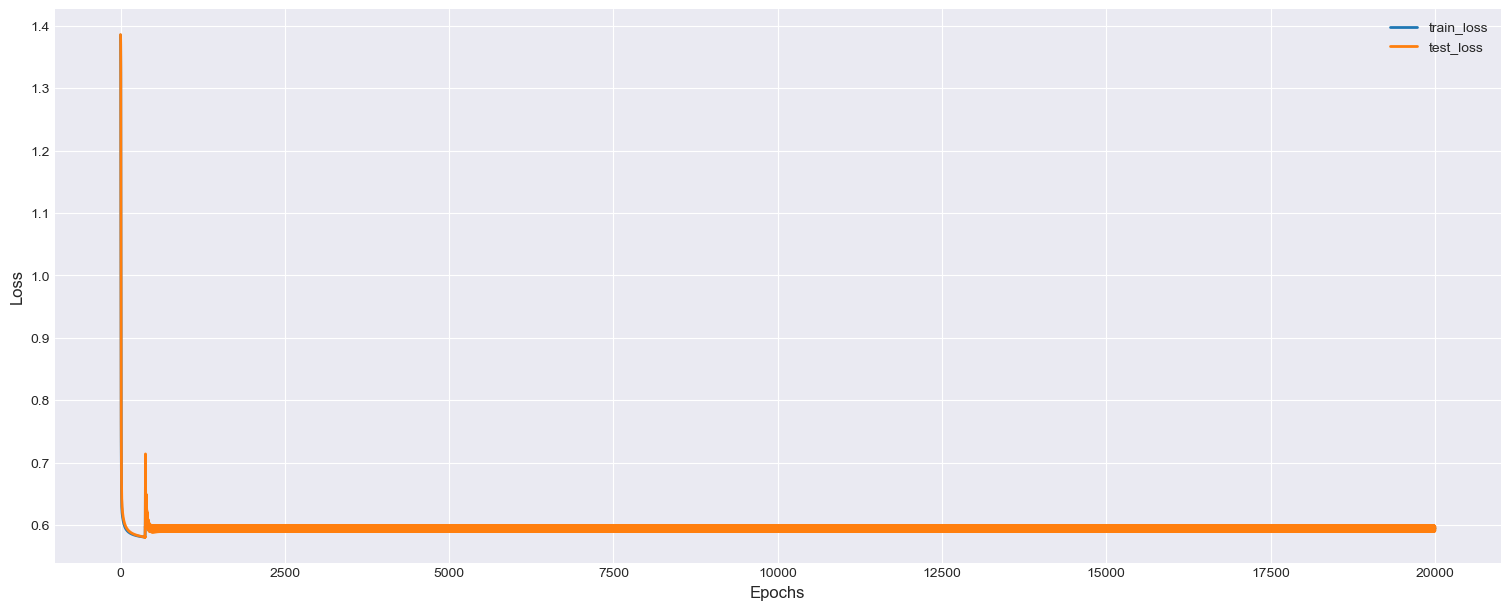

In [142]:
loss_df = pd.DataFrame(loss_hist)
fig, ax = plt.subplots()

ax.plot(loss_df['loss'], label='train_loss', lw=2)
ax.plot(loss_df['test_loss'], label='test_loss', lw=2)
ax.legend()
plt.tight_layout()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

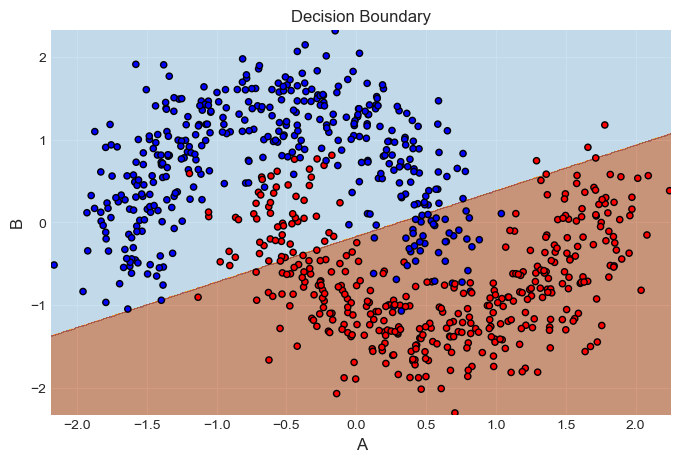

In [143]:
fn_plot_decision_boundary(X_train_scl, y_train.argmax(axis=1), model, predict)

In [144]:
y_pred = predict(model, X_train_scl)
from sklearn.metrics import accuracy_score, classification_report,\
                            confusion_matrix, ConfusionMatrixDisplay, f1_score

print(classification_report(y_train.argmax(axis=1), y_pred))
f1 = f1_score(y_train.argmax(axis=1), y_pred, average='weighted')


              precision    recall  f1-score   support

           0       0.85      0.89      0.87       400
           1       0.88      0.84      0.86       400

    accuracy                           0.86       800
   macro avg       0.86      0.86      0.86       800
weighted avg       0.86      0.86      0.86       800



In [145]:
y_pred = predict(model, X_test_scl)
from sklearn.metrics import accuracy_score, classification_report,\
                            confusion_matrix, ConfusionMatrixDisplay, f1_score

print(classification_report(y_test.argmax(axis=1), y_pred))


              precision    recall  f1-score   support

           0       0.82      0.90      0.86       100
           1       0.89      0.80      0.84       100

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

